In [1]:
# create data directories to allocate smaller subset from original kaggle set
import os, shutil

original_dataset_dir = os.path.realpath('/Users/felipe-tovar-henao/Downloads/dogs-vs-cats/train')
base_dir = '/Users/felipe-tovar-henao/Documents/Jupyter Notebook/deep-learning-notebook/cats_and_dogs_small' 
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

dir_list = ['train', 'validation', 'test']
subdir_list = ['cats', 'dogs']

for d in dir_list:
    tmp_dir = os.path.join(base_dir, d)
    if not os.path.exists(tmp_dir):
        os.mkdir(tmp_dir)
    for sd in subdir_list:
        tmp_sd = os.path.join(tmp_dir, sd)
        if not os.path.exists(tmp_sd):
            os.mkdir(tmp_sd)

In [2]:
# copy files into new dirs
pets = ['cat', 'dog']
data_boundaries = [0, 1000, 1500, 2000]
for pet in pets:
    for n in range(len(data_boundaries) - 1):
        [st, end] = data_boundaries[n:(n + 2)]
        fnames = [f'{pet}.{i}.jpg' for i in range(st, end)]
        for fname in fnames:
            src = os.path.join(original_dataset_dir, fname)
            dst = os.path.join(base_dir, dir_list[n], f'{pet}s', fname)
            if not os.path.exists(dst):
                shutil.copyfile(src, dst)

In [3]:
from keras import models, layers
kernel_dims = (3,3)
pool_size = (2, 2)
model = models.Sequential([
    layers.Conv2D(32, kernel_dims, activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(pool_size),
    layers.Conv2D(64, kernel_dims, activation='relu'),
    layers.MaxPooling2D(pool_size),
    layers.Conv2D(128, kernel_dims, activation='relu'),
    layers.MaxPooling2D(pool_size),
    layers.Conv2D(128, kernel_dims, activation='relu'),
    layers.MaxPooling2D(pool_size),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

2022-10-28 08:13:25.500683: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-28 08:13:31.951699: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [5]:
# compile model
from keras import optimizers

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['acc']
)

In [7]:
# data pre-processing using image data generator
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [9]:
# using the models.Sequential.fit() method with a generator

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)
# save model to prevent unnecessary re-training in the future
model.save('cats_and_dogs_small_1.h5')

/var/folders/7p/vgp7lsyd48q2xzczfxzvxr0c0000gn/T/ipykernel_2591/767228241.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 32s 305ms/step - loss: 0.6915 - acc: 0.5330 - val_loss: 0.6797 - val_acc: 0.5600
Epoch 2/30
100/100 [==============================] - 29s 292ms/step - loss: 0.6644 - acc: 0.5950 - val_loss: 0.6596 - val_acc: 0.5850
Epoch 3/30
100/100 [==============================] - 29s 292ms/step - loss: 0.6118 - acc: 0.6755 - val_loss: 0.6138 - val_acc: 0.6460
Epoch 4/30
100/100 [==============================] - 30s 300ms/step - loss: 0.5728 - acc: 0.6950 - val_loss: 0.5921 - val_acc: 0.6670
Epoch 5/30
100/100 [==============================] - 29s 294ms/step - loss: 0.5401 - acc: 0.7165 - val_loss: 0.5824 - val_acc: 0.6880
Epoch 6/30
100/100 [==============================] - 31s 314ms/step - loss: 0.5077 - acc: 0.7395 - val_loss: 0.6244 - val_acc: 0.6620
Epoch 7/30
100/100 [==============================] - 32s 322ms/step - loss: 0.4806 - acc: 0.7730 - val_loss: 0.5756 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 3

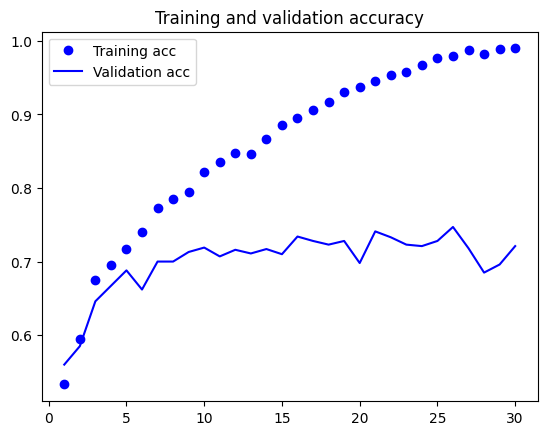

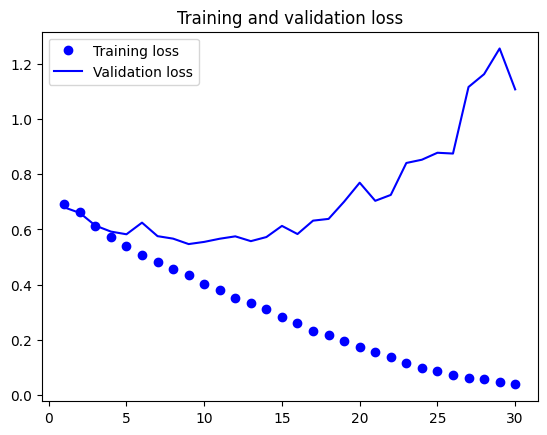

In [10]:
# plot training vs validation metrics
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
# the plot below is what overfitting typically looks like
# data augmentation can help mitigate overfitting

In [12]:
# doing data augmentation with data generators
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

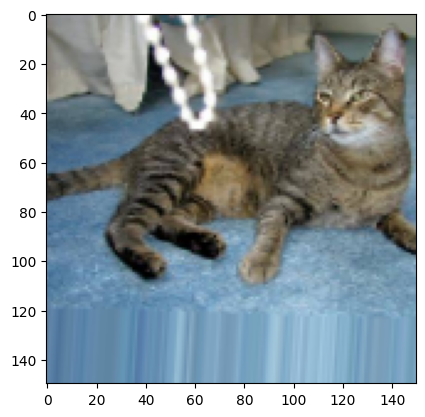

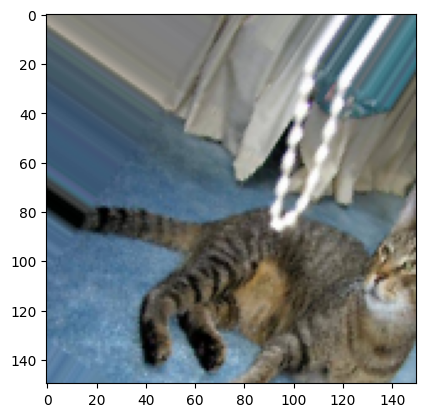

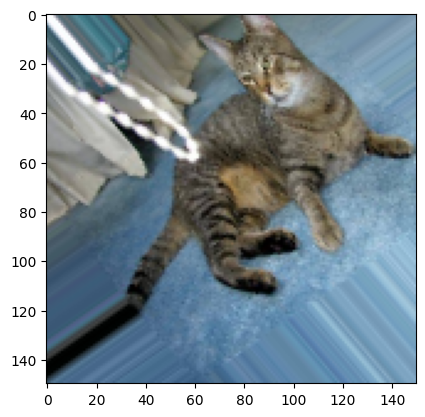

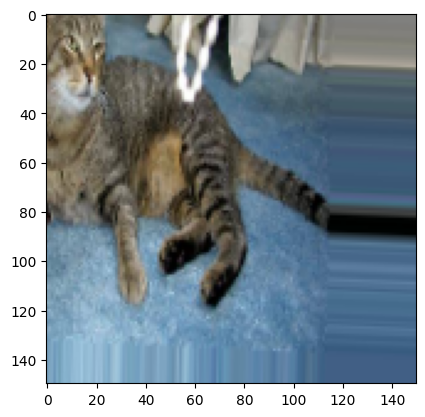

In [15]:
# visualizing data-augmented images
from keras.utils import load_img, img_to_array, array_to_img

train_cats_dir = os.path.join(train_dir, 'cats')

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = load_img(img_path, target_size=(150, 150))

x = img_to_array(img)

x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()